In [53]:
import numpy as np
import pandas as pd

In [54]:
df = pd.read_csv('train.csv')

In [55]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [56]:
#Data Cleaning

In [57]:
df.shape

(5574, 2)

In [58]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [59]:
df.rename(columns={'sms':'text','label':'target'},inplace=True)

In [60]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [61]:
df.duplicated().sum()

403

In [62]:
#Remove duplicate

In [63]:
df = df.drop_duplicates(keep='first')

In [64]:
df.duplicated().sum()

0

In [65]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [66]:
df.shape

(5171, 2)

In [67]:
#Data Analisys

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

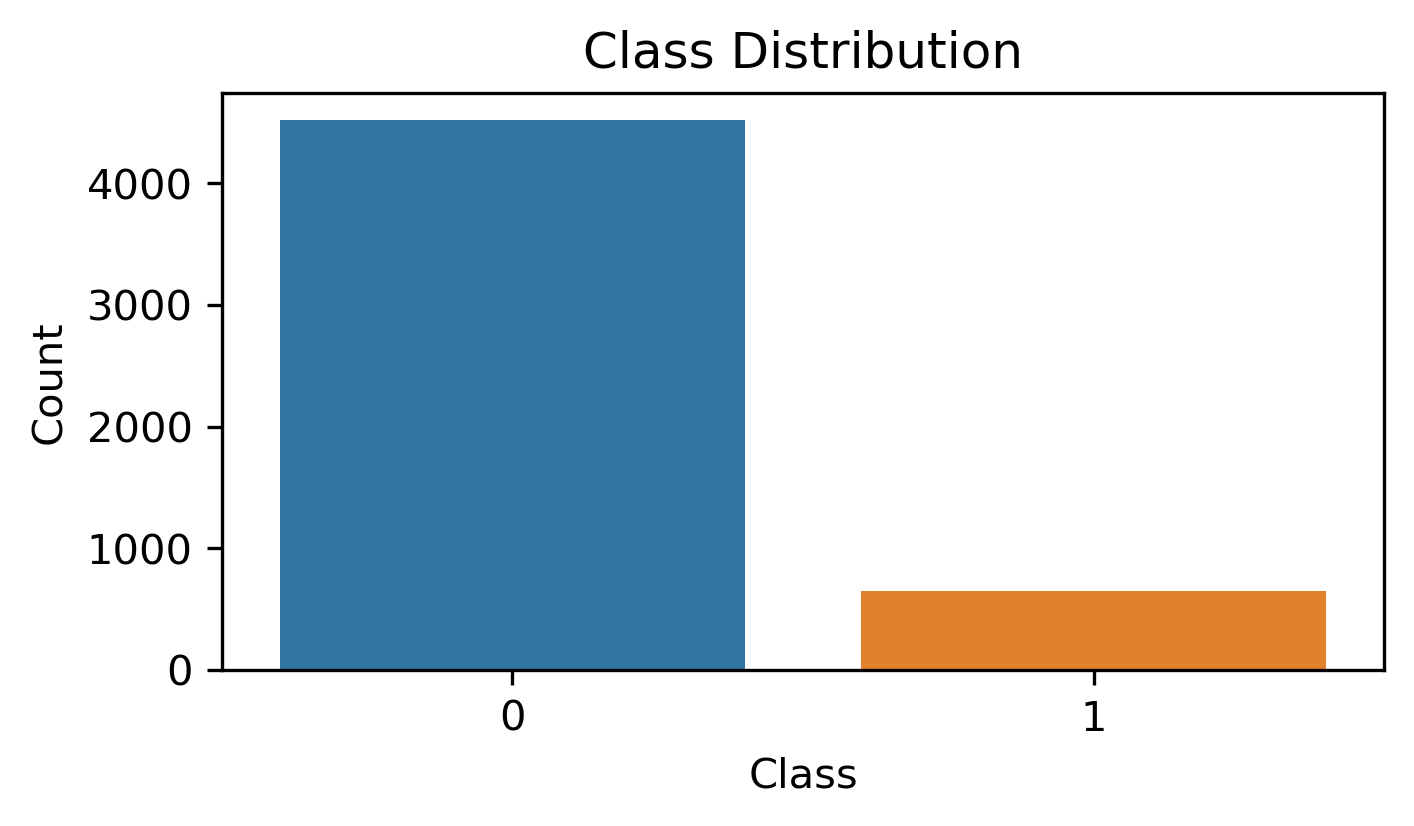

In [69]:
plt.figure(figsize=(5, 2.5), dpi=300)
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [94]:
import nltk
from nltk import word_tokenize

In [95]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [85]:
df['count_text_character'] = df['text'].apply(len)

In [84]:
df.head()

,text,target,count_text_character,count_text_number
0,"Go until jurong point, crazy.. Available only ...",0,20,112
1,Ok lar... Joking wif u oni...\n,0,6,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,156
3,U dun say so early hor... U c already then say...,0,11,50
4,"Nah I don't think he goes to usf, he lives aro...",0,13,62


In [86]:
df['count_text_number'] = df['text'].apply(lambda x:len(x.split(' ')))

In [87]:
df.head()

,text,target,count_text_character,count_text_number
0,"Go until jurong point, crazy.. Available only ...",0,112,20
1,Ok lar... Joking wif u oni...\n,0,30,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28
3,U dun say so early hor... U c already then say...,0,50,11
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13


In [88]:
df.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [89]:
df.iloc[1].text

'Ok lar... Joking wif u oni...\n'

In [91]:
df['count_text_sentence'] = df['text'].apply(lambda x:len(x.split(',')))

In [92]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2
1,Ok lar... Joking wif u oni...\n,0,30,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1
3,U dun say so early hor... U c already then say...,0,50,11,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2


In [96]:
df[['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,5171.000000,5171.000000,5171.000000
mean,80.332431,15.549217,1.334751
std,58.333188,11.196886,0.782243
min,3.000000,1.000000,1.000000
25%,37.000000,7.000000,1.000000
50%,62.000000,12.000000,1.000000
75%,120.000000,22.000000,1.000000
max,911.000000,171.000000,14.000000


In [97]:
df[df['target'] == 0][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,4518.000000,4518.000000,4518.000000
mean,71.894865,14.358566,1.308986
std,56.590179,11.276420,0.750567
min,3.000000,1.000000,1.000000
25%,35.000000,7.000000,1.000000
50%,54.000000,11.000000,1.000000
75%,92.000000,19.000000,1.000000
max,911.000000,171.000000,14.000000


In [98]:
df[df['target'] == 1][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,653.000000,653.000000,653.000000
mean,138.710567,23.787136,1.513017
std,29.818940,5.948838,0.955401
min,14.000000,2.000000,1.000000
25%,133.000000,22.000000,1.000000
50%,149.000000,25.000000,1.000000
75%,158.000000,28.000000,2.000000
max,224.000000,35.000000,7.000000


In [99]:
import seaborn as sns

<Axes: xlabel='count_text_character', ylabel='Count'>

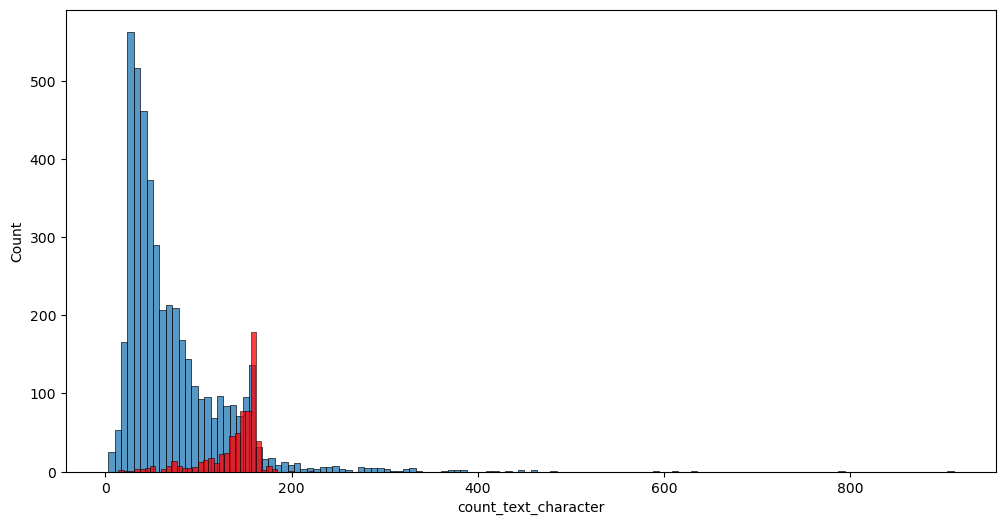

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['count_text_character'])
sns.histplot(df[df['target'] == 1]['count_text_character'],color='red')

<Axes: xlabel='count_text_number', ylabel='Count'>

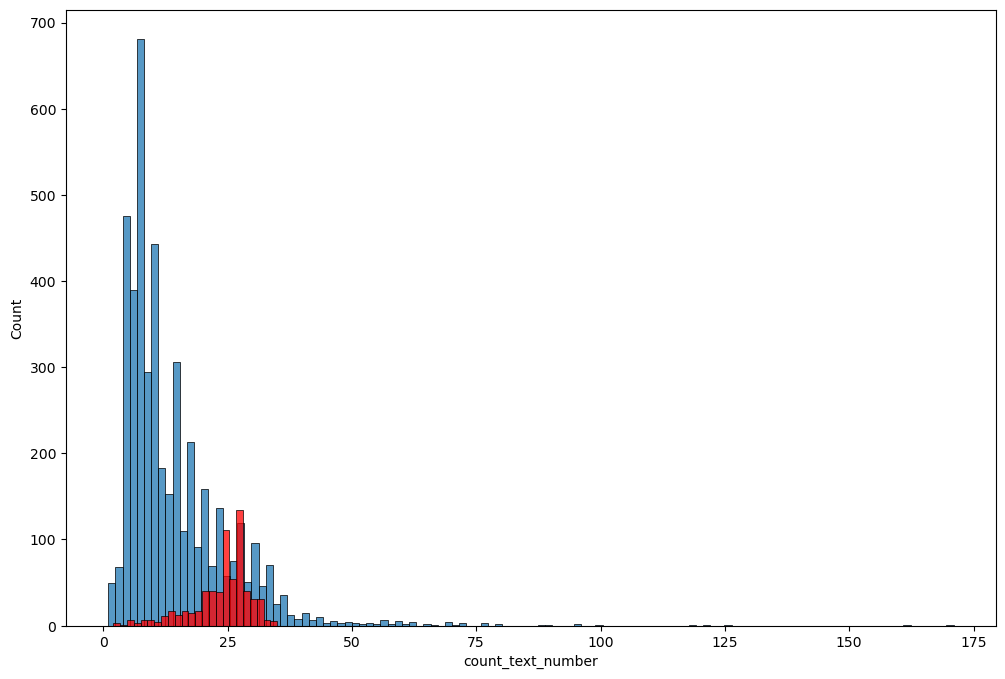

In [103]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['count_text_number'])
sns.histplot(df[df['target'] == 1]['count_text_number'],color='red')

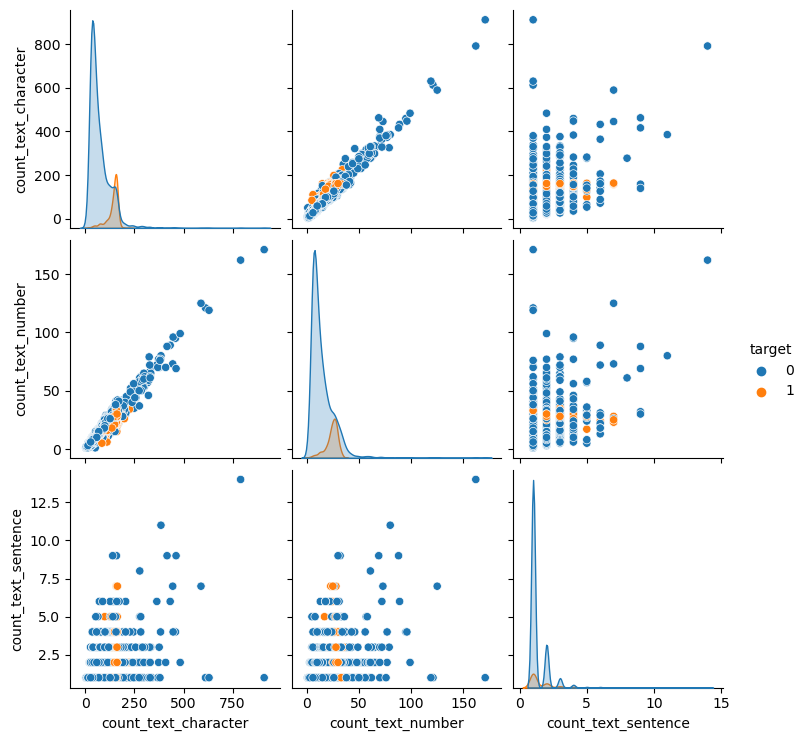

In [104]:
sns.pairplot(df,hue='target')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20900\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

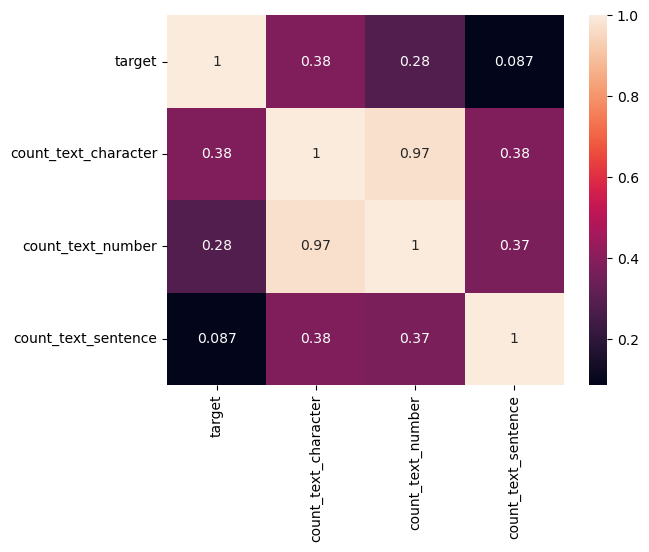

In [106]:
sns.heatmap(df.corr(),annot=True)